**SPAM VS HAM MAIL PREDICTION**

**Spam mails form an accountable part of our cyberlives.**

**Perhaps, a system to categorize the mails as they reach the inbox - is a simple step that goes a long way.**

**In Machine Learning, a number of base and ensemble algorithms are used for effective classifiation.**

**I have explored most of those classification algorithms here.**

**----------------------------------------------------------------------------**

##### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### **Dataset**

In [ ]:
maildf = pd.read_csv("mail_data.csv")
maildf.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### **Label Encoding**

In [ ]:
le = LabelEncoder()
target = maildf["Category"]
maildf["Category"] = le.fit_transform(maildf["Category"])

In [ ]:
maildf["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

##### **The Split**

In [ ]:
X = maildf.drop(columns=['Category'])
y = maildf["Category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 1), (1672, 1), (3900,), (1672,))

##### **Imbalance upsampling**

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 3400, 1: 500})

(array([3400.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

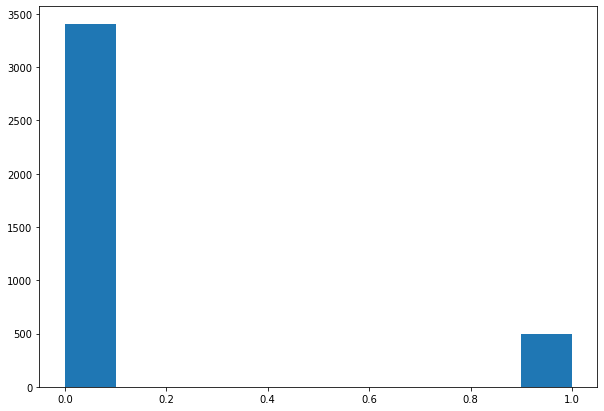

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(y_train)

In [ ]:
train = pd.concat([X_train["Message"], y_train], axis=1)

In [ ]:
train

,Message,Category
2420,SMS SERVICES For your inclusive text credits p...,1
2725,Nope... C ü then...,0
3968,YOU HAVE WON! As a valued Vodafone customer ou...,1
3294,A little. Meds say take once every 8 hours. It...,0
3583,You are right. Meanwhile how's project twins c...,0
...,...,...
925,Actually i deleted my old website..now i m blo...,0
3650,Hmm ill have to think about it... ok you're fo...,0
4699,Don no da:)whats you plan?,0
4883,As usual u can call me ard 10 smth.,0


In [ ]:
# Upsampling

train_minority = train[train["Category"]==1]

from sklearn.utils import resample
minority_upsampled = resample(train_minority, replace=True, n_samples=2860)           # 3380-520 = 2860
# minority_upsampled = resample(y_train_minority, replace=True, n_samples=500)

train_upsampled = pd.concat([train, minority_upsampled])

In [ ]:
Counter(train_upsampled["Category"])

Counter({0: 3400, 1: 3360})

In [ ]:
train_upsampled

,Message,Category
2420,SMS SERVICES For your inclusive text credits p...,1
2725,Nope... C ü then...,0
3968,YOU HAVE WON! As a valued Vodafone customer ou...,1
3294,A little. Meds say take once every 8 hours. It...,0
3583,You are right. Meanwhile how's project twins c...,0
...,...,...
1407,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",1
1780,"Loan for any purpose £500 - £75,000. Homeowner...",1
2248,Back 2 work 2morro half term over! Can U C me ...,1
2146,Sunshine Hols. To claim ur med holiday send a ...,1


In [ ]:
train_upsampled.shape

(6760, 2)

(array([3400.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3360.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

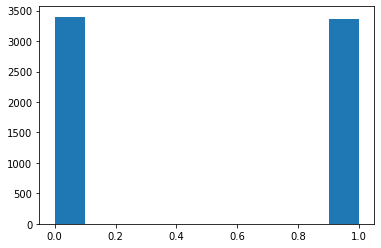

In [ ]:
plt.hist(train_upsampled["Category"])

Redefining the train datasets --> X_train, y_train

In [ ]:
X_train = train_upsampled.drop(columns=["Category"])
y_train = train_upsampled["Category"]

In [ ]:
Counter(y_test)

Counter({0: 1425, 1: 247})

##### **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase='True')
# feature_extraction = TfidfVectorizer()

X_train_features = feature_extraction.fit_transform(X_train['Message'])
X_test_features = feature_extraction.transform(X_test['Message'])

In [ ]:
y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 666)	0.23637613703633945
  (0, 320)	0.27005025891357054
  (0, 67)	0.23637613703633945
  (0, 3106)	0.17796685064926412
  (0, 1562)	0.21056727125590038
  (0, 2495)	0.21855213452709105
  (0, 5971)	0.12618504552915186
  (0, 6588)	0.20033162163685503
  (0, 421)	0.23637613703633945
  (0, 3838)	0.22167893018305024
  (0, 4364)	0.20033162163685503
  (0, 1759)	0.4478616859738238
  (0, 7000)	0.12646872626278463
  (0, 2923)	0.27005025891357054
  (0, 4821)	0.17469792633226605
  (0, 1876)	0.20826583035565988
  (0, 6244)	0.1254857728665937
  (0, 3338)	0.21756918113090015
  (0, 5550)	0.19059062354328726
  (0, 5766)	0.16596046223649094
  (1, 4423)	1.0
  (2, 168)	0.4044531709207104
  (2, 3544)	0.17080815803173277
  (2, 2300)	0.26786394361358196
  (2, 1707)	0.26076927049175697
  :	:
  (6758, 6074)	0.21146188999534002
  (6758, 2243)	0.2390446849342246
  (6758, 6587)	0.21146188999534002
  (6758, 5521)	0.23240117274779096
  (6758, 5933)	0.22316194827307215
  (6758, 1310)	0.15916101259393672
  (6758, 4

In [ ]:
X_train_features

<6760x7091 sparse matrix of type '<class 'numpy.float64'>'
	with 74143 stored elements in Compressed Sparse Row format>

In [ ]:
feature_extraction.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '008704050406',
 '0089',
 '0125698789',
 '02',
 '0207',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090298926',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '077xxx',
 '078',
 '07808',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '0789xxxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081263000',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680ts',
 '08706091795',
 '0870737910216yrs',
 '08707500020',
 '08707509020',


In [ ]:
X_train["Message"]

2420    SMS SERVICES For your inclusive text credits p...
2725                                  Nope... C ü then...
3968    YOU HAVE WON! As a valued Vodafone customer ou...
3294    A little. Meds say take once every 8 hours. It...
3583    You are right. Meanwhile how's project twins c...
                              ...                        
1407    URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...
1780    Loan for any purpose £500 - £75,000. Homeowner...
2248    Back 2 work 2morro half term over! Can U C me ...
2146    Sunshine Hols. To claim ur med holiday send a ...
1073    Dear U've been invited to XCHAT. This is our f...
Name: Message, Length: 6760, dtype: object

##### **LogisticRegressionClassifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train_features, y_train)

LogisticRegression()

Valuation

In [ ]:
y_pred = lor.predict(X_test_features)

Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9742822966507177
2. Confusion Matrix -  [[1409   27]
 [  16  220]]
3. Classification_report -                precision    recall  f1-score   support

           0       0.99      0.98      0.98      1436
           1       0.89      0.93      0.91       236

    accuracy                           0.97      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
lor.score(X_test_features, y_test)

0.9742822966507177

In [ ]:
accuracy_score(y_pred, y_test)

0.9742822966507177

##### **KNearestNeighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_features, y_train)

KNeighborsClassifier()

Valuation

In [ ]:
y_pred = knn.predict(X_test_features)

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9419856459330144
2. Confusion Matrix -  [[1424   96]
 [   1  151]]
3. Classification_report -                precision    recall  f1-score   support

           0       1.00      0.94      0.97      1520
           1       0.61      0.99      0.76       152

    accuracy                           0.94      1672
   macro avg       0.81      0.97      0.86      1672
weighted avg       0.96      0.94      0.95      1672



In [ ]:
knn.score(X_test_features, y_test)

0.9419856459330144

##### **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=10)

dtree.fit(X_train_features, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Valuation

In [ ]:
y_predt = dtree.predict(X_test_features)

In [ ]:
y_predt

array([0, 0, 0, ..., 0, 1, 1])

Prediction Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_predt, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_predt, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_predt, y_test))

1. Accuracy Score -  0.9383971291866029


2. Confusion Matrix - 
 [[1394   72]
 [  31  175]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1466
           1       0.71      0.85      0.77       206

    accuracy                           0.94      1672
   macro avg       0.84      0.90      0.87      1672
weighted avg       0.95      0.94      0.94      1672



In [ ]:
dtree.score(X_test_features, y_test)

0.9383971291866029

##### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_features, y_train)

RandomForestClassifier()

Valuation

In [ ]:
y_pred = rfc.predict(X_test_features)

Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9766746411483254
2. Confusion Matrix -  [[1425   39]
 [   0  208]]
3. Classification_report -                precision    recall  f1-score   support

           0       1.00      0.97      0.99      1464
           1       0.84      1.00      0.91       208

    accuracy                           0.98      1672
   macro avg       0.92      0.99      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
rfc.score(X_test_features, y_test)

0.9766746411483254

##### **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradboostclass = GradientBoostingClassifier()

gradboostclass.fit(X_train_features, y_train)

GradientBoostingClassifier()

Valuation

In [ ]:
y_predg = gradboostclass.predict(X_test_features)

In [ ]:
y_predg

array([0, 0, 0, ..., 0, 1, 1])

Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_predg, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_predg, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_predg, y_test))

1. Accuracy Score -  0.9611244019138756


2. Confusion Matrix - 
 [[1404   44]
 [  21  203]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1448
           1       0.82      0.91      0.86       224

    accuracy                           0.96      1672
   macro avg       0.90      0.94      0.92      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
gradboostclass.score(X_test_features, y_test)

0.9611244019138756

##### **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboostclass = AdaBoostClassifier(
    learning_rate=1
)

adaboostclass.fit(X_train_features, y_train)

AdaBoostClassifier(learning_rate=1)

Valuation

In [ ]:
y_preda = adaboostclass.predict(X_test_features)

In [ ]:
y_preda

array([0, 0, 0, ..., 0, 1, 1])

Performance Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_preda, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_preda, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_preda, y_test))

1. Accuracy Score -  0.9635167464114832


2. Confusion Matrix - 
 [[1402   38]
 [  23  209]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1440
           1       0.85      0.90      0.87       232

    accuracy                           0.96      1672
   macro avg       0.92      0.94      0.93      1672
weighted avg       0.96      0.96      0.96      1672



##### **XGBClassifier**

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_features, y_train)

XGBClassifier()

Valuation

In [ ]:
y_pred = xgb.predict(X_test_features)

Classification metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score - ", accuracy_score(y_pred, y_test))
print("2. Confusion Matrix - ", confusion_matrix(y_pred, y_test))
print("3. Classification_report - ", classification_report(y_pred, y_test))

1. Accuracy Score -  0.9569377990430622
2. Confusion Matrix -  [[1396   43]
 [  29  204]]
3. Classification_report -                precision    recall  f1-score   support

           0       0.98      0.97      0.97      1439
           1       0.83      0.88      0.85       233

    accuracy                           0.96      1672
   macro avg       0.90      0.92      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
xgb.score(X_test_features, y_test)

0.9569377990430622

##### **Inference**

**AdaBoostClassifier prevails and predicts the given text precisely with maximum accuracy**

##### **Deployment**

In [ ]:
# Pckle dump

import pickle

pickle.dump(rfc, open("adaboostlass.pkl", "wb"))

In [ ]:
# Pydantic

!pip install pydantic
from pydantic import BaseModel

class incoming_mail(BaseModel):
  Message : str

  class Config:
    schema_extra = {
        "example" : {
            "Message"           : "qwertyuioplkjhgfdsazxcvbnm ",
                    }
    }

In [ ]:
# FastAPI

!pip install fastapi
from fastapi import FastAPI

app = FastAPI()

@app.on_event("startup")
def load_model():                                   # path.operation.functiuno
  global model
  model = pickle.load(open("adaboostclass.pkl", "rb"))

@app.get("/")
def index():
  return {"message" : "Homepage of API"}

@app.post("predict")
def get_incoming_mail(data: incoming_mail):
  received = data.dict()
  Message  =  received["Message"]

  pred_name = model.predict([Message]).tolist()[0]
  return {"prediction" : pred_name}

In [ ]:
# ColabCode

!pip install colabcode

from colabcode import ColabCode

server = ColabCode(port = 15000, code=False)

In [ ]:
server.run_app(app = app)

Public URL: NgrokTunnel: "https://2e63-34-74-185-217.ngrok.io" -> "http://localhost:15000"
